# E-commerce Sales Performance Analysis

This notebook provides a comprehensive analysis of e-commerce sales data, including:
- Data loading and exploration
- Data cleaning and preprocessing
- Exploratory Data Analysis (EDA)
- Data visualization
- Business insights and recommendations

---

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Import custom modules
import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))

from data_loader import load_sales_data, get_data_info
from data_cleaner import clean_sales_data
from analyzer import (
    calculate_kpis, print_kpis, analyze_by_category, analyze_by_region,
    analyze_by_time, analyze_top_products, analyze_customer_demographics,
    analyze_payment_methods
)
from visualizer import (
    plot_sales_trend, plot_category_analysis, plot_region_analysis,
    plot_top_products, plot_customer_demographics, plot_payment_methods,
    plot_heatmap_correlation
)

print("[OK] All libraries imported successfully")

[OK] All libraries imported successfully


## 2. Load Data

In [2]:
# Load the sales data
df = load_sales_data('../data/raw/sales_data.csv')
print(f"Data loaded successfully! Shape: {df.shape}")

Data loaded successfully! Shape: (5000, 12)


## 3. Data Overview

In [3]:
# Display basic information
get_data_info(df)

DATASET INFORMATION

Shape: 5000 rows × 12 columns

Column Names:
  1. Order_ID
  2. Order_Date
  3. Customer_ID
  4. Product_Name
  5. Category
  6. Quantity
  7. Unit_Price
  8. Total_Amount
  9. Discount
  10. Region
  11. Payment_Method
  12. Customer_Age_Group

Data Types:
Order_ID                         str
Order_Date            datetime64[us]
Customer_ID                      str
Product_Name                     str
Category                         str
Quantity                       int64
Unit_Price                   float64
Total_Amount                 float64
Discount                     float64
Region                           str
Payment_Method                   str
Customer_Age_Group               str
dtype: object

Missing Values:
Customer_Age_Group    100
dtype: int64

Basic Statistics:
                       Order_Date     Quantity   Unit_Price  Total_Amount  \
count                        5000  5000.000000  5000.000000   5000.000000   
mean   2023-12-29 00:00:17.280000 

In [ ]:
# Display first few rows
df.head(10)

## 4. Data Cleaning

In [4]:
# Clean the data
df_clean = clean_sales_data(df)
print(f"\nCleaned data shape: {df_clean.shape}")

DATA CLEANING PROCESS

1. Handling missing values...
   [OK] Filled 100 missing values

2. Checking for duplicates...
   [OK] No duplicates found

3. Handling outliers...
   [OK] Capped 633 outliers

4. Ensuring correct data types...
   [OK] Data types verified

5. Adding derived columns...
   [OK] Added Year, Month, Quarter, Day_of_Week, Revenue_After_Discount

DATA CLEANING COMPLETE

Final Dataset Shape: 5000 rows × 18 columns

Cleaned data shape: (5000, 18)


## 5. Key Performance Indicators (KPIs)

In [5]:
# Calculate and display KPIs
kpis = calculate_kpis(df_clean)
print_kpis(kpis)


KEY PERFORMANCE INDICATORS (KPIs)

[REVENUE] Total Revenue: $1,151,129.97
[ORDERS] Total Orders: 5,000
[AOV] Average Order Value: $230.23
[QUANTITY] Total Quantity Sold: 9,471 units
[AVG QTY] Average Quantity per Order: 1.89 units
[DISCOUNT] Total Discount Given: $29,730.52
[DISCOUNT %] Discount Rate: 2.58%
[CUSTOMERS] Unique Customers: 3,840
[PRODUCTS] Unique Products: 64
[CATEGORIES] Unique Categories: 8


## 6. Exploratory Data Analysis

### 6.1 Category Analysis

In [6]:
# Analyze by category
category_analysis = analyze_by_category(df_clean)
print("Category Performance:")
print(category_analysis)

Category Performance:
                  Total_Revenue  Avg_Order_Value  Order_Count  Total_Quantity  \
Category                                                                        
Electronics           427307.76           672.93          635            1194   
Sports                253875.52           394.83          643            1156   
Home & Kitchen        184277.09           296.74          621            1196   
Clothing              100520.43           156.33          643            1235   
Beauty                 64331.25           108.85          591            1164   
Toys                   54684.12            88.63          617            1195   
Food & Beverages       33740.62            53.30          633            1222   
Books                  32393.18            52.50          617            1109   

                  Revenue_Share_%  
Category                           
Electronics                 37.12  
Sports                      22.05  
Home & Kitchen         

In [ ]:
# Visualize category performance
plot_category_analysis(df_clean, save=False)

### 6.2 Regional Analysis

In [7]:
# Analyze by region
region_analysis = analyze_by_region(df_clean)
print("Regional Performance:")
print(region_analysis)

Regional Performance:
               Total_Revenue  Avg_Order_Value  Order_Count  Total_Quantity  \
Region                                                                       
North America      203134.68           244.15          832            1568   
Europe             200837.88           234.08          858            1573   
Oceania            199387.06           232.39          858            1637   
Africa             188673.60           225.15          838            1608   
South America      185178.03           222.84          831            1589   
Asia               173918.72           222.12          783            1496   

               Revenue_Share_%  
Region                          
North America            17.65  
Europe                   17.45  
Oceania                  17.32  
Africa                   16.39  
South America            16.09  
Asia                     15.11  


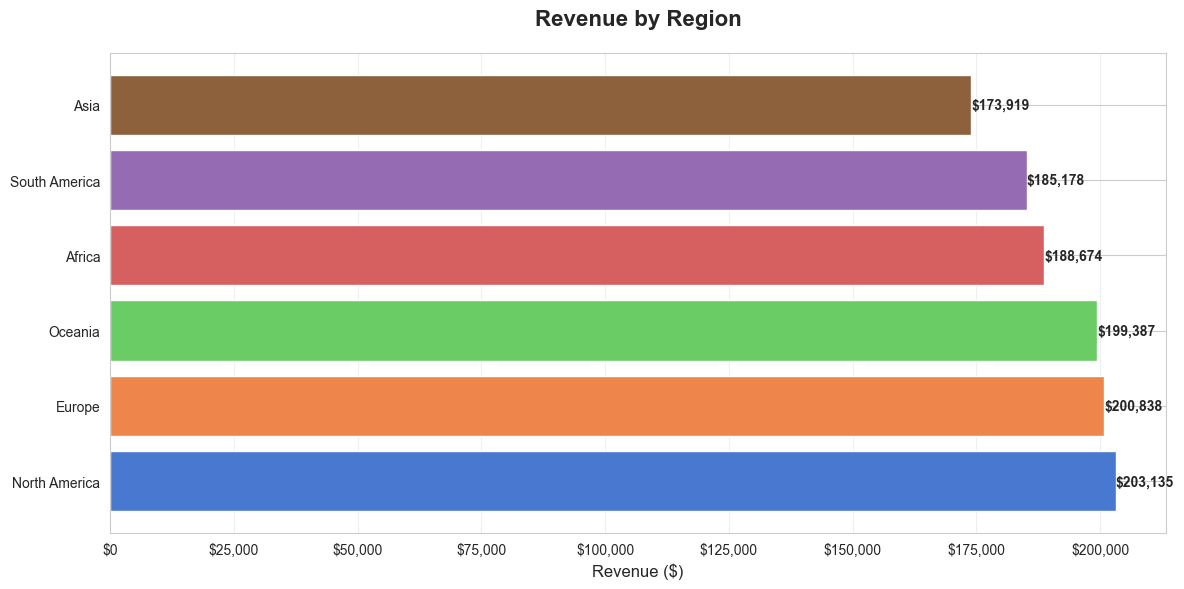

In [8]:
# Visualize regional performance
plot_region_analysis(df_clean, save=False)

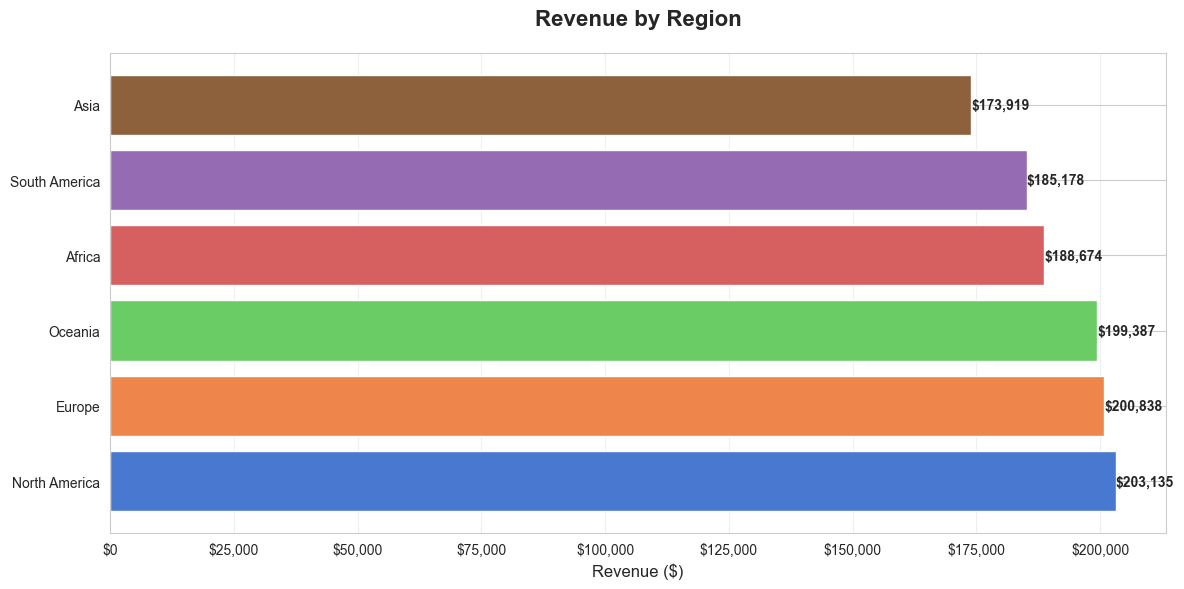

In [9]:
# Visualize regional performance
plot_region_analysis(df_clean, save=False)

### 6.3 Time-Based Analysis

In [10]:
# Analyze sales trends over time
time_analysis = analyze_by_time(df_clean)

print("Monthly Sales:")
print(time_analysis['monthly'])
print("\nQuarterly Sales:")
print(time_analysis['quarterly'])
print("\nYearly Sales:")
print(time_analysis['yearly'])

Monthly Sales:
             Revenue  Orders  Quantity
Year Month                            
2023 1      55526.13     237       441
     2      38404.13     174       334
     3      51809.74     223       416
     4      47905.55     184       351
     5      44658.78     228       425
     6      40052.66     193       351
     7      47123.39     190       375
     8      57413.04     232       447
     9      50456.73     225       462
     10     46861.14     207       420
     11     49989.91     222       430
     12     44108.37     214       365
2024 1      58834.07     232       469
     2      40187.64     189       367
     3      43782.12     200       376
     4      41768.92     184       347
     5      54499.19     203       371
     6      53787.64     227       409
     7      56304.56     233       443
     8      50375.30     231       412
     9      47729.49     206       386
     10     41100.09     191       340
     11     40274.23     172       327
     12   

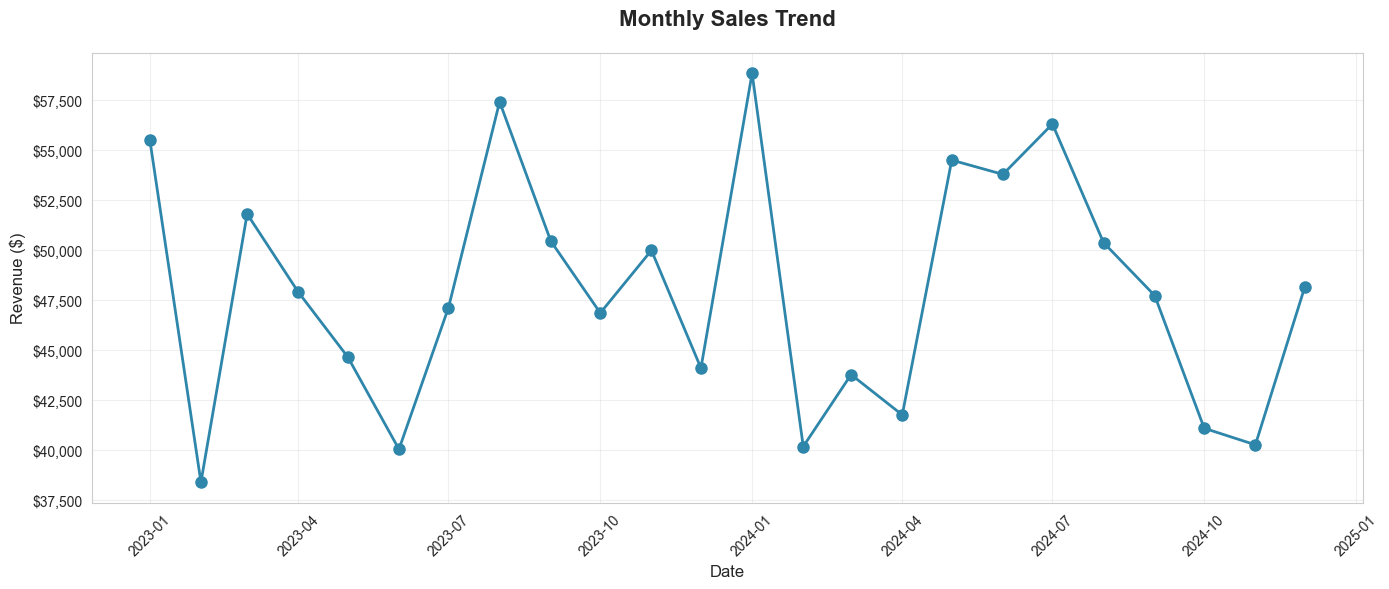

In [11]:
# Visualize sales trend
plot_sales_trend(df_clean, save=False)

### 6.4 Top Products Analysis

In [12]:
# Analyze top products
top_products = analyze_top_products(df_clean, top_n=15)
print("Top 15 Products by Revenue:")
print(top_products)

Top 15 Products by Revenue:
                              Total_Revenue  Order_Count  Total_Quantity  \
Product_Name  Category                                                     
Laptop        Electronics          57347.99           88             165   
Smartwatch    Electronics          57087.88           84             154   
Smartphone    Electronics          54145.56           78             150   
Headphones    Electronics          53996.74           81             147   
Monitor       Electronics          53817.16           81             165   
Speaker       Electronics          52484.75           79             132   
Camera        Electronics          49861.41           73             144   
Tablet        Electronics          48566.29           71             137   
Water Bottle  Sports               35345.22           92             159   
Tennis Racket Sports               33911.35           81             148   
Yoga Mat      Sports               33715.60           89    

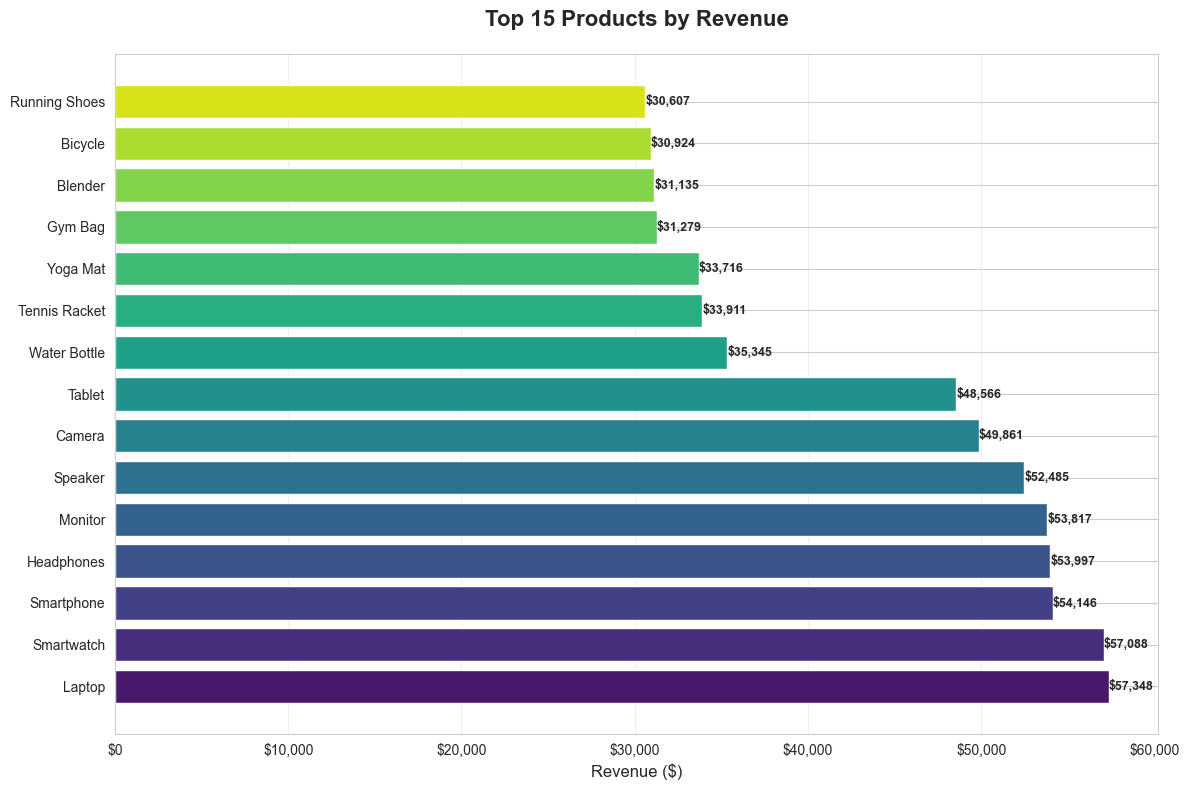

In [13]:
# Visualize top products
plot_top_products(df_clean, top_n=15, save=False)

### 6.5 Customer Demographics

In [14]:
# Analyze customer demographics
demo_analysis = analyze_customer_demographics(df_clean)
print("Customer Demographics:")
print(demo_analysis)

Customer Demographics:
                    Unique_Customers  Total_Revenue  Avg_Order_Value  \
Customer_Age_Group                                                     
46-55                            963      234743.01           230.59   
18-25                            924      230171.60           238.03   
26-35                            909      228895.65           238.43   
36-45                            953      219395.26           216.37   
56+                              894      214231.44           227.66   
Unknown                           99       23693.02           236.93   

                    Total_Orders  
Customer_Age_Group                
46-55                       1018  
18-25                        967  
26-35                        960  
36-45                       1014  
56+                          941  
Unknown                      100  


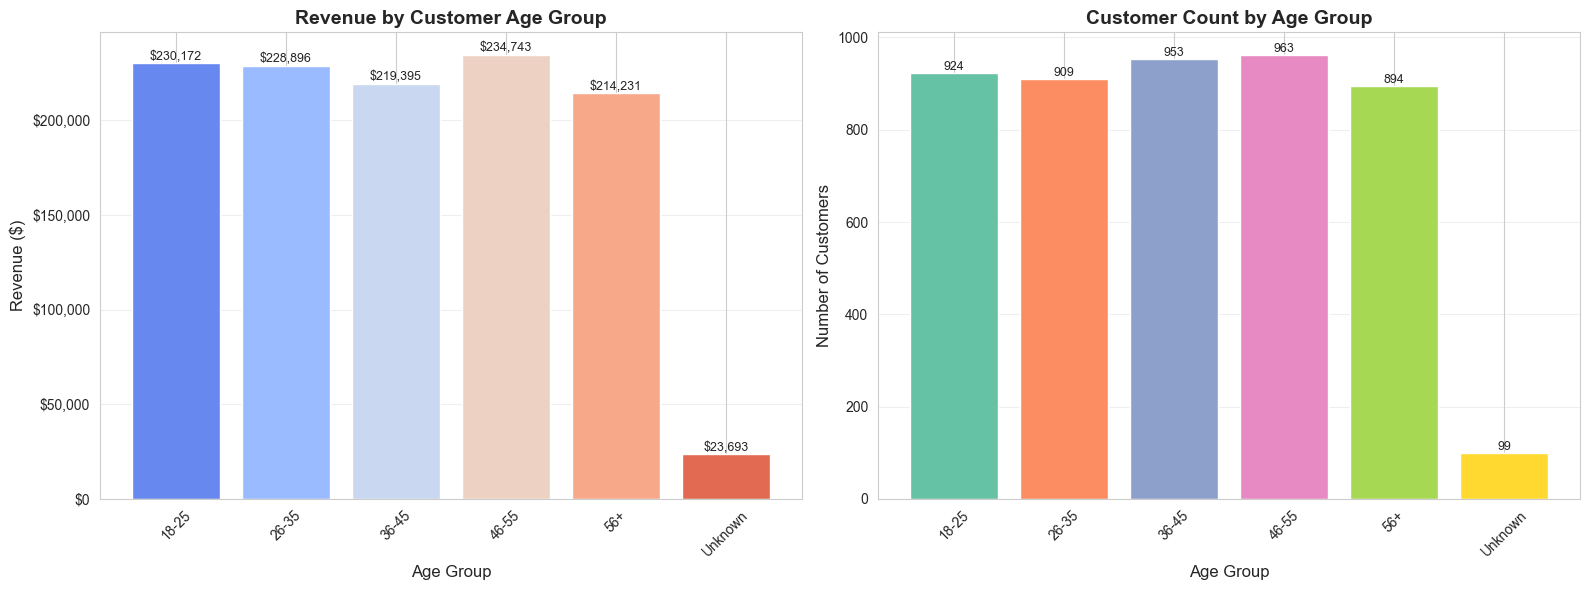

In [15]:
# Visualize customer demographics
plot_customer_demographics(df_clean, save=False)

### 6.6 Payment Method Analysis

In [16]:
# Analyze payment methods
payment_analysis = analyze_payment_methods(df_clean)
print("Payment Method Usage:")
print(payment_analysis)

Payment Method Usage:
                  Total_Revenue  Transaction_Count  Order_Count  Usage_%
Payment_Method                                                          
Credit Card           232260.22               1013         1013    20.26
Debit Card            231503.97                983          983    19.66
Bank Transfer         231313.78               1032         1032    20.64
Cash on Delivery      228958.96                993          993    19.86
PayPal                227093.04                979          979    19.58


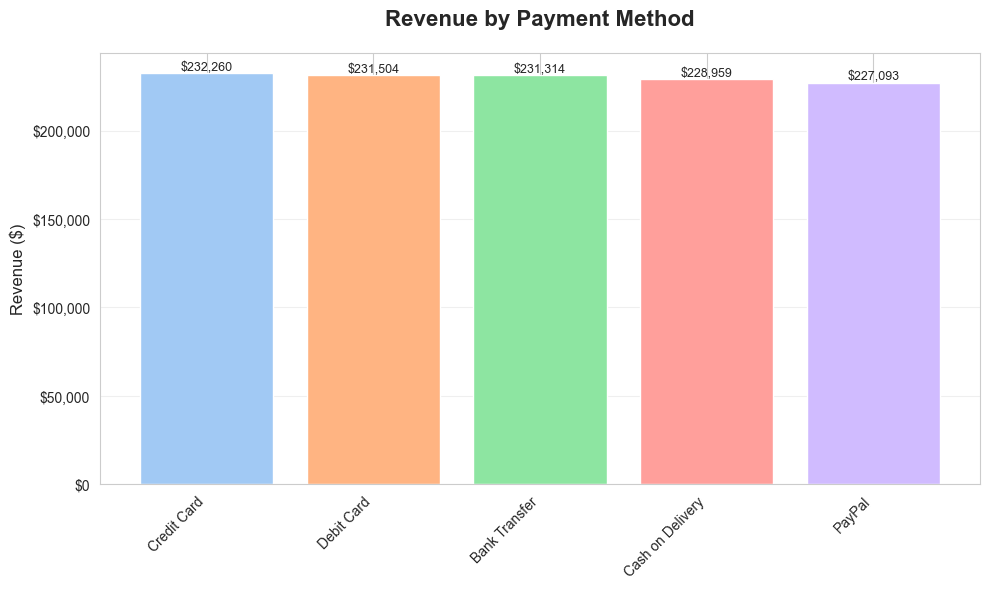

In [17]:
# Visualize payment methods
plot_payment_methods(df_clean, save=False)

### 6.7 Correlation Analysis

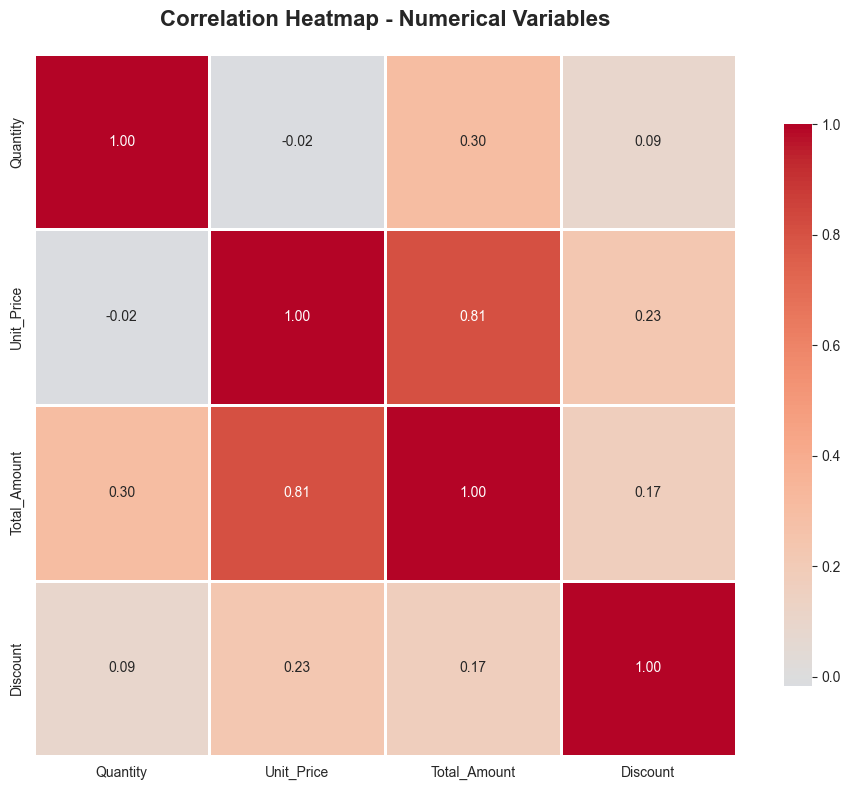

In [18]:
# Visualize correlations
plot_heatmap_correlation(df_clean, save=False)

## 7. Key Insights Summary

In [19]:
# Generate key insights
print("=" * 80)
print("KEY INSIGHTS")
print("=" * 80)

print(f"\n1. Top Category: {category_analysis.index[0]}")
print(f"   Revenue: ${category_analysis.iloc[0]['Total_Revenue']:,.2f}")
print(f"   Share: {category_analysis.iloc[0]['Revenue_Share_%']}%")

print(f"\n2. Top Region: {region_analysis.index[0]}")
print(f"   Revenue: ${region_analysis.iloc[0]['Total_Revenue']:,.2f}")
print(f"   Share: {region_analysis.iloc[0]['Revenue_Share_%']}%")

print(f"\n3. Top Product: {top_products.index[0][0]}")
print(f"   Revenue: ${top_products.iloc[0]['Total_Revenue']:,.2f}")
print(f"   Orders: {int(top_products.iloc[0]['Order_Count'])}")

print(f"\n4. Average Order Value: ${kpis['Average_Order_Value']:,.2f}")
print(f"5. Total Customers: {kpis['Unique_Customers']:,}")
print(f"6. Discount Rate: {kpis['Discount_Rate']:.2f}%")

KEY INSIGHTS

1. Top Category: Electronics
   Revenue: $427,307.76
   Share: 37.12%

2. Top Region: North America
   Revenue: $203,134.68
   Share: 17.65%

3. Top Product: Laptop
   Revenue: $57,347.99
   Orders: 88

4. Average Order Value: $230.23
5. Total Customers: 3,840
6. Discount Rate: 2.58%
